In [5]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from pandas_datareader import data as web
import yfinance as yf
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from scipy.stats import norm
from IPython.core.display import display, HTML
import plotly.graph_objs as go

C:\Users\z004s8rp\AppData\Local\Temp\ipykernel_125220\2503045687.py:11: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# 1. Gathering Data

In [8]:
tickers = ["TAEE4.SA"]
yf.pdr_override()
start_date = "2023-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')
data = round(web.get_data_yahoo(tickers, start=start_date, end=end_date), 2)
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,11.75,11.75,11.41,11.62,10.08,357200
2023-01-03,11.61,11.61,11.32,11.38,9.87,430700
2023-01-04,11.38,11.50,11.29,11.39,9.88,344300
2023-01-05,11.47,11.47,11.31,11.38,9.87,293900
2023-01-06,12.00,12.04,11.66,11.85,10.28,1650500


# 2. Applying Analysis

In [9]:
data['Daily_Return'] = data['Adj Close'].pct_change()
data['Momentum'] = data['Adj Close'] - data['Adj Close'].shift(1)

# Dropping NaN values
data.dropna(inplace=True)

# 3. Visualizing Data

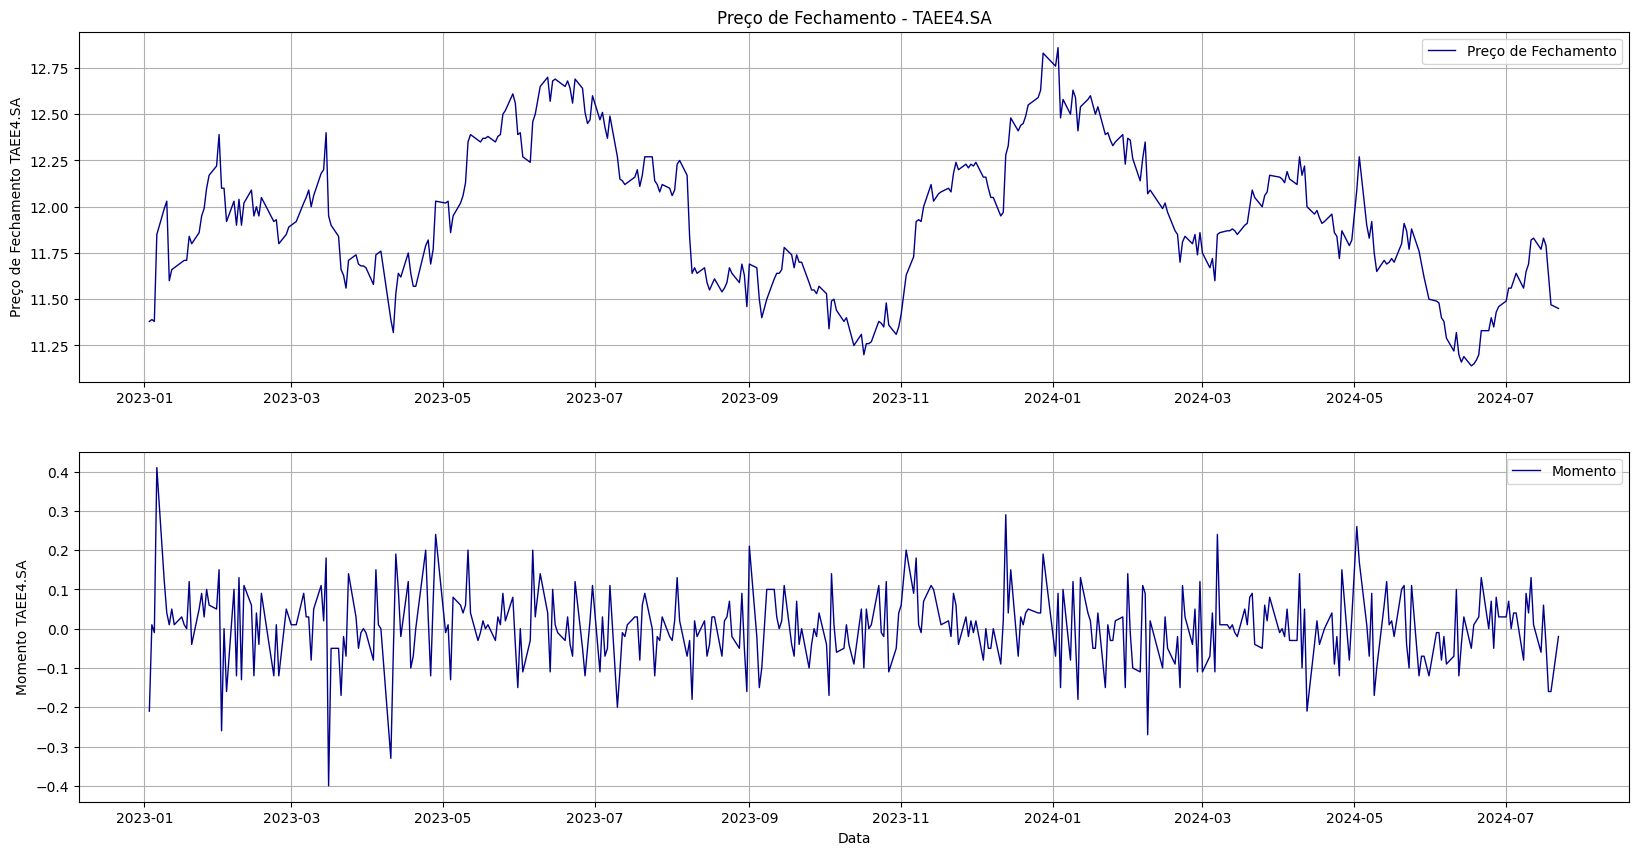

In [10]:
plt.figure(figsize=(20, 10))
plt.subplot(2,1,1)

plt.plot(data.index, data['Close'], label='Preço de Fechamento', linewidth=1, color='darkblue')
plt.title(f"Preço de Fechamento - {tickers[0]}")
plt.ylabel(f"Preço de Fechamento {tickers[0]}")
plt.legend()
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(data.index, data['Momentum'], label='Momento', linewidth=1, color='darkblue')
plt.xlabel("Data")
plt.ylabel(f"Momento {tickers[0]}")
plt.legend()
plt.grid(True)

# 4. Building Functions

In [17]:
def check_momentum(ticker, start_date, end_date, bool_show_graph):
    yf.pdr_override()
    start_date = "2023-01-01"
    end_date = datetime.today().strftime('%Y-%m-%d')
    data = round(web.get_data_yahoo(tickers, start=start_date, end=end_date), 2)
    data['Daily_Return'] = data['Adj Close'].pct_change()
    data['Momentum'] = data['Adj Close'] - data['Adj Close'].shift(1)

    if bool_show_graph:
        plot_graph(ticker, start_date, end_date)

def plot_graph(ticker, start_date, end_date):
    plt.figure(figsize=(20, 10))
    plt.subplot(2,1,1)
    
    plt.plot(data.index, data['Close'], label='Preço de Fechamento', linewidth=1, color='darkblue')
    for date, momentum in zip(data.index, data['Momentum']):
        if momentum > 0.2:
            plt.axvline(x=date, color='green', linestyle='--', linewidth=1.5)
        #elif momentum < -0.2:
        #    plt.axvline(x=date, color='orange', linestyle='--', linewidth=1.5)
        
    plt.title(f"Preço de Fechamento - {tickers[0]}")
    plt.ylabel(f"Preço de Fechamento {tickers[0]}")
    plt.legend()
    plt.grid(True)
    
    plt.subplot(2,1,2)
    plt.plot(data.index, data['Momentum'], label='Momento', linewidth=1, color='darkblue')
    for date, momentum in zip(data.index, data['Momentum']):
        if momentum > 0.2:
            plt.axvline(x=date, color='green', linestyle='--', linewidth=1.5)
        #elif momentum < -0.2:
        #    plt.axvline(x=date, color='orange', linestyle='--', linewidth=1.5)
    plt.xlabel("Data")
    plt.ylabel(f"Momento {tickers[0]}")
    plt.legend()
    plt.grid(True)   

[*********************100%%**********************]  1 of 1 completed


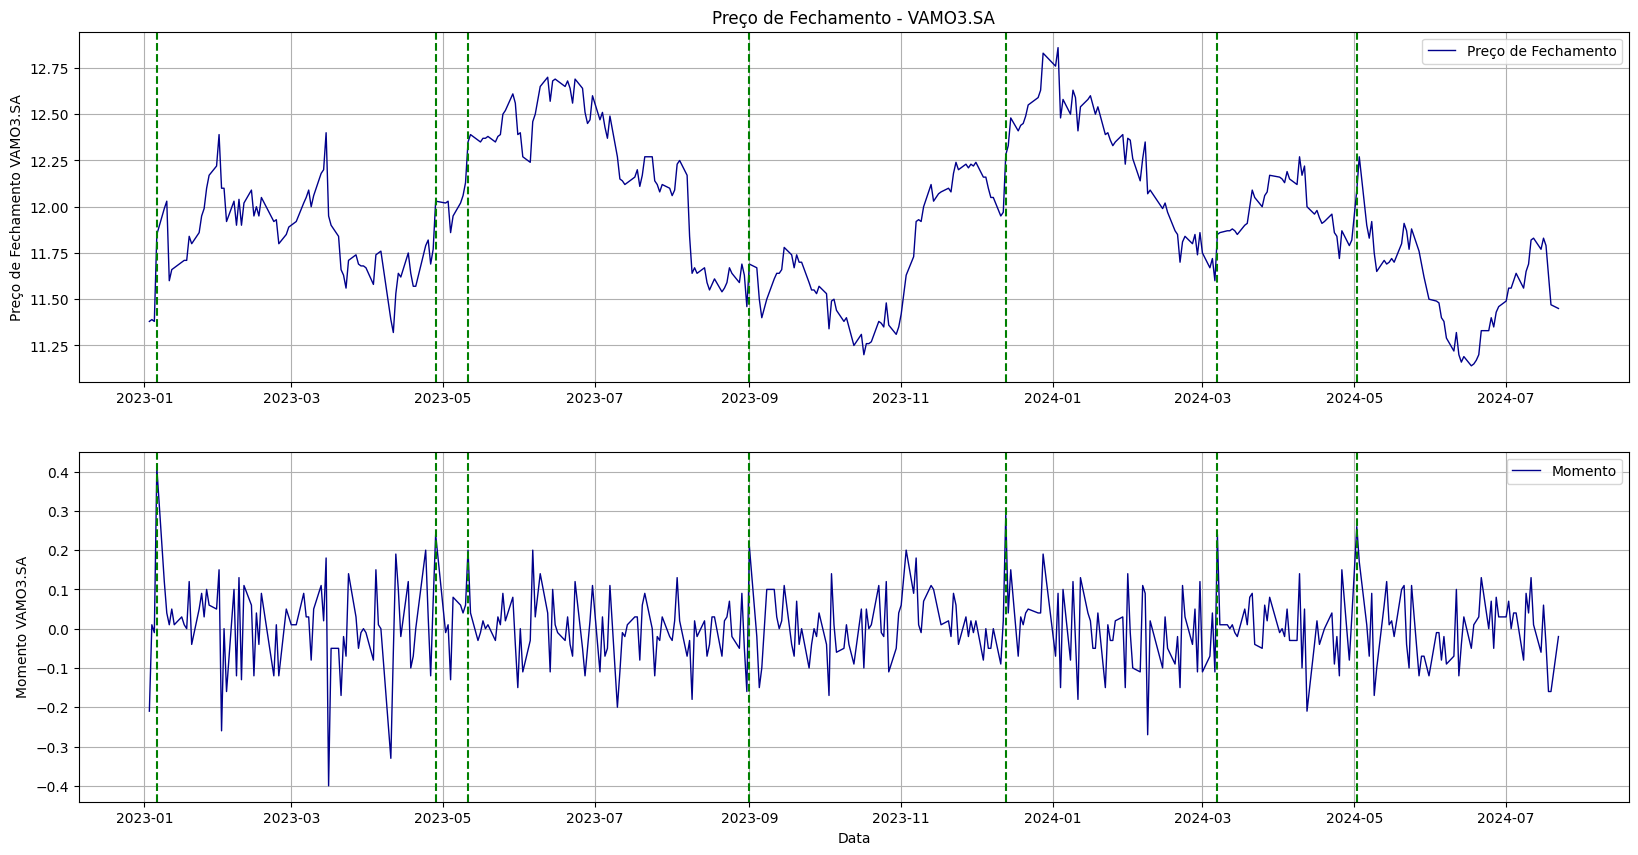

In [18]:
tickers = [
    "VAMO3.SA"
]

for ticker in tickers:
    check_momentum(ticker, "2023-01-01", datetime.today().strftime('%Y-%m-%d'), True)